In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from IPython.display import Markdown
from ISLP import load_data
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

weekly = load_data("Weekly")
weekly_numerical = weekly.assign(Direction=(weekly["Direction"] == "Up").astype(int))
default = load_data("default")
default_numerical = default.assign(
    default=(default["default"] == "Yes").astype(int),
    student=(default["student"] == "Yes").astype(int),
)
boston = load_data("Boston")
sns.set_theme()

# Problem 1

$$
\begin{split}
p(X)&=\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}} \\
\frac{p(X)}{1-p(X)}&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{1-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1+e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1+e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1+e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1}{1+e^{\beta_0+\beta_1 X}}} \\
&=e^{\beta_0+\beta_1 X}
\end{split}
$$

# Problem 2

## Problem 2.a

On average, $\frac{1}{10}$ of the observations will be used to make the predictions.

## Problem 2.b

On average, $\frac{1}{100}$ of the observations will be used to make the predictions.

## Problem 2.c

On average, $10^{-100}$ of the observations will be used to be used to make the predictions.

## Problem 2.d

As the number of features increase, fewer of the larger set will be used for inference, which will make the model seem relatively 'dumber' as it sees a very local pictures and never really 'understanding' a larger picture, therefore also causing really high variance and overfitting.

## Problem 2.e

$$
\begin{split}
s^{p}&=10^{-1} \\
p\ln s&=-\ln 10 \\
\ln s&=-p^{-1}\ln 10 \\
s&=10^{-p^{-1}}
\end{split}
$$

### p=1

$$
s=10^{-1}=0.1
$$

### p=2

$$
s=10^{-0.5}\approx .32
$$

### p=100

$$
s=10^{-.01}\approx 0.98
$$

# Problem 3

## Problem 3.a

$$
Y=\sigma\left(\hat{\beta}_0+\hat{\beta}_1 X_1+\hat{\beta}_2 X_2\right)=\sigma\left(-6+40\cdot .05+1\cdot 3.5\right)=\sigma(-0.5)\approx .377
$$

## Problem 3.b

$$
\begin{split}
0.5&=\sigma\left(\hat{\beta}_0+\hat{\beta}_1 X_1+\hat{\beta}_2 X_2\right)=\sigma\left(-6+0.05h+3.5\right) \\
0.5&=\sigma\left(0.05h-2.5\right)
h\approx 50
\end{split}
$$

# Problem 4

We would prefer the regression, because the $K=1$ KNN will have a $0\%$ error on the training data ( the NN of any data point in the training data set will just be itself ), which means that it had a $36\%$ error on the testing data. Scince the $36\%$ test error for KNN is more than the $30\%$ error on the linear regression, we would prefer the regression to classify new observations.

# Problem 5

## Problem 5.a

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


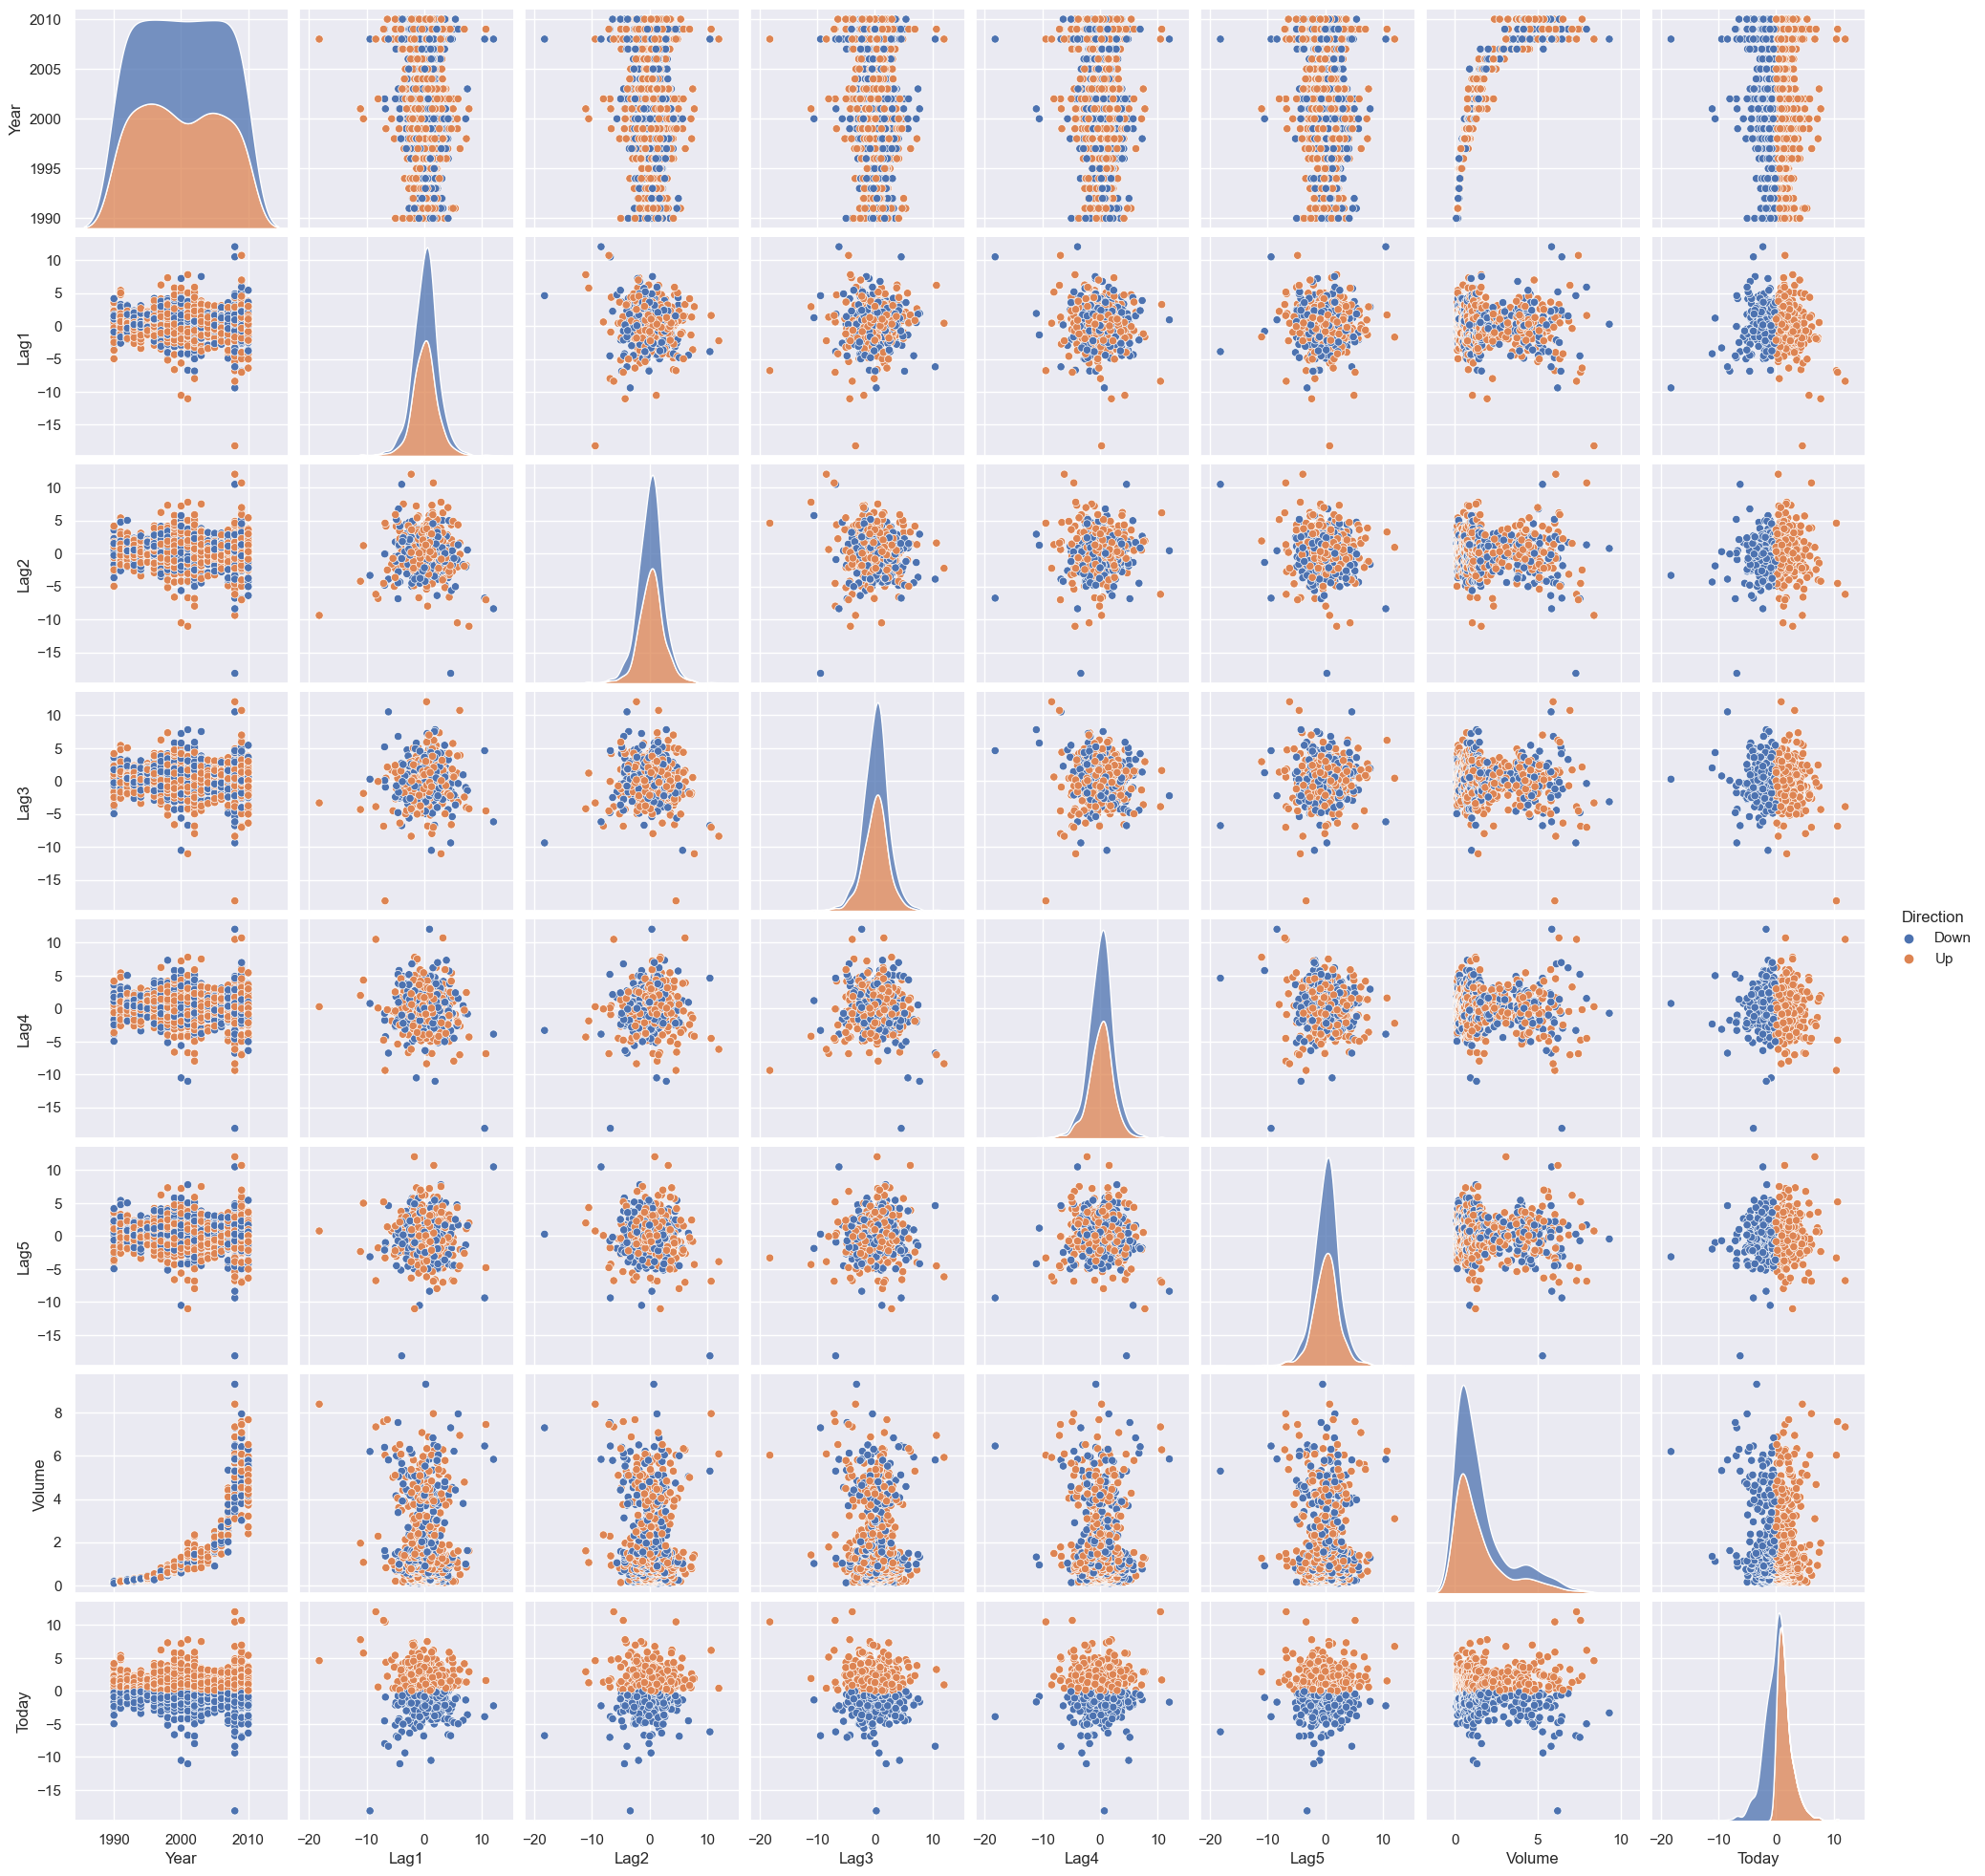

In [31]:
# | warning: false
sns.pairplot(weekly, hue="Direction", diag_kws={"multiple": "stack"})

From looking at the graphs, we can see that Today is clustered by Direction and there is a correlation between Volume and year.

## Problem 5.b

In [32]:
model = smf.logit(
    "Direction ~ Volume + Lag1 + Lag2 + Lag3 + Lag4 + Lag5", data=weekly_numerical
).fit(disp=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                0.006580
Time:                        10:27:11   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
==============================================================================
"""

Lag2 is the only statistically significant correlation.

## Problem 5.c

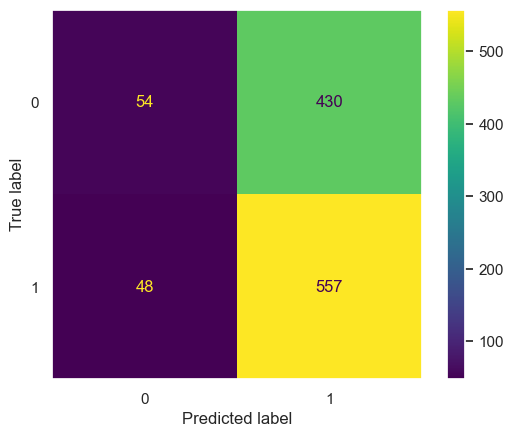

In [33]:
sns.set_theme(style="dark")
ConfusionMatrixDisplay.from_estimator(
    LogisticRegression().fit(
        weekly_numerical[["Volume", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]],
        weekly_numerical["Direction"],
    ),
    weekly_numerical[["Volume", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]],
    weekly_numerical["Direction"],
)
plt.show()

We can see that the model is very hesitant to guess 0, so it will have a very high recall but a low precision and accuracy.

## Problem 5.d

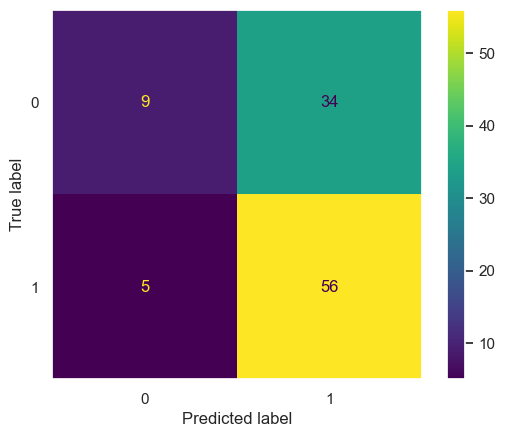

In [34]:
weekly_training_numerical = weekly_numerical[weekly_numerical["Year"] <= 2008]
weekly_testing_numerical = weekly_numerical[weekly_numerical["Year"] >= 2009]
ConfusionMatrixDisplay.from_estimator(
    LogisticRegression().fit(
        weekly_training_numerical[["Lag2"]],
        weekly_training_numerical["Direction"],
    ),
    weekly_testing_numerical[["Lag2"]],
    weekly_testing_numerical["Direction"],
)
plt.show()

We can see that the model is very hesitant to guess 0, so it will have a very high recall but a low precision and accuracy, just like the non-validation set counterpart, which means it seems like the model was not overfitting.

## Probelm 5.e

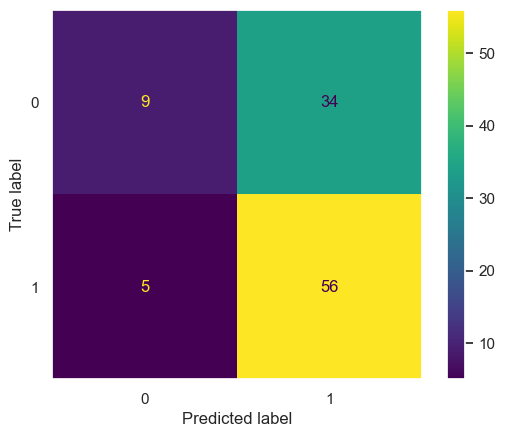

In [35]:
ConfusionMatrixDisplay.from_estimator(
    LinearDiscriminantAnalysis().fit(
        weekly_training_numerical[["Lag2"]],
        weekly_training_numerical["Direction"],
    ),
    weekly_testing_numerical[["Lag2"]],
    weekly_testing_numerical["Direction"],
)
plt.show()

This is identical to the last matrix, so at least for this set Linear Discriminant Analysis and Logistic Regression have identical results: very high recall but a low precision and accuracy.

## Problem 5.f

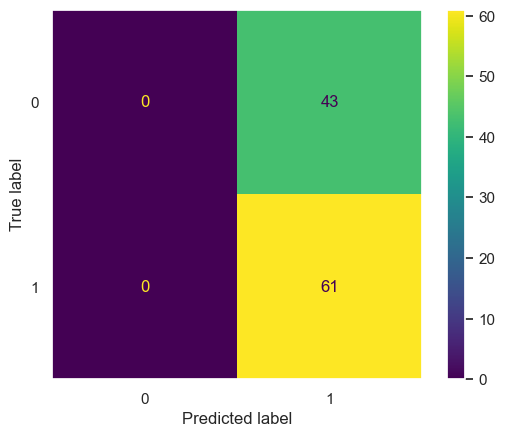

In [36]:
ConfusionMatrixDisplay.from_estimator(
    QuadraticDiscriminantAnalysis().fit(
        weekly_training_numerical[["Lag2"]],
        weekly_training_numerical["Direction"],
    ),
    weekly_testing_numerical[["Lag2"]],
    weekly_testing_numerical["Direction"],
)
plt.show()

This model never guesses 0, which turns out to have a perfect recall but a lower precision and accuracy.

## Problem 5.g

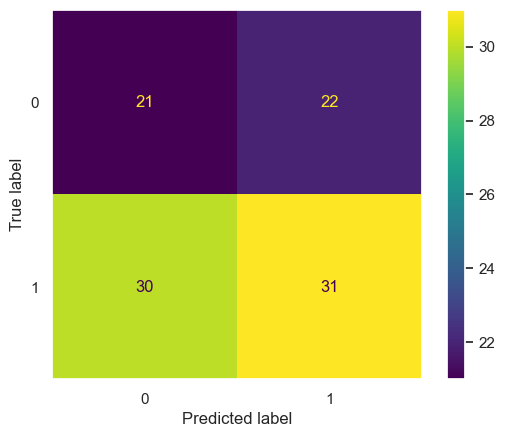

In [37]:
ConfusionMatrixDisplay.from_estimator(
    KNeighborsClassifier(n_neighbors=1).fit(
        weekly_training_numerical[["Lag2"]],
        weekly_training_numerical["Direction"],
    ),
    weekly_testing_numerical[["Lag2"]],
    weekly_testing_numerical["Direction"],
)
plt.show()

This is a very even split between the guesses, and turns out to get a slightly better precision and accuracy but a much lower recall.

## Probem 5.h

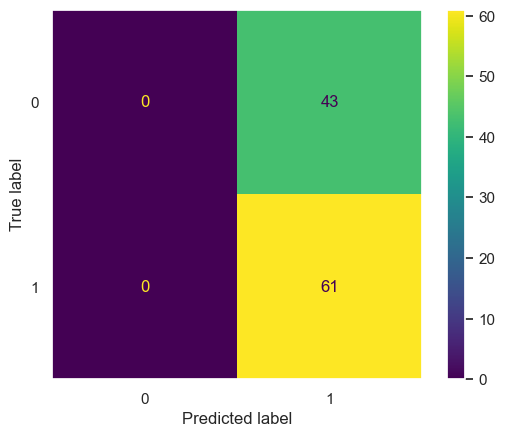

In [38]:
ConfusionMatrixDisplay.from_estimator(
    GaussianNB().fit(
        weekly_training_numerical[["Lag2"]],
        weekly_training_numerical["Direction"],
    ),
    weekly_testing_numerical[["Lag2"]],
    weekly_testing_numerical["Direction"],
)
plt.show()
sns.set_theme()

This model also never guesses $0$, which will make it also have a perfect recall but bad precision and accuracy.

# Problem 6

## Problem 6.a

Each bootstrap observation has a $\frac{1}{n}$ chance of being equal to the $j$th element of the original sample, so it has a $1-\frac{1}{n}=\frac{n-1}{n}$ chance of not being the $j$th observation.

## Problem 6.b

Every bootstrap observation is sampled identically, so it is also $\frac{n-1}{n}$

## Problem 6.c

Each bootstrap observation has a $1-\frac{1}{n}$ probability of not being the $j$th observation, so the chance that every one of $n$ bootsrap observations in a bootstrap sample of size $n$ is not the $j$th observation is $\left(1-\frac{1}{n}\right)^n$.

## Problem 6.d

$\left(1-\frac{1}{n}\right)^n=\left(1-\frac{1}{5}\right)^5\approx 0.33$

## Problem 6.e

$\left(1-\frac{1}{n}\right)^n=\left(1-\frac{1}{100}\right)^{100}\approx 0.37$

## Problem 6.f

$\left(1-\frac{1}{n}\right)^n=\left(1-\frac{1}{10000}\right)^{10000}\approx 0.37$

## Problem 6.g

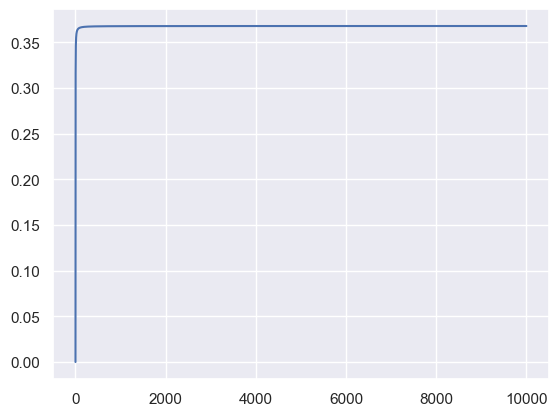

In [39]:
x = np.arange(1, 10000)
sns.lineplot((1 - 1 / x) ** x)
plt.show()

$\left(1-\frac{1}{n}\right)^n$ increases and asymptotes to $e^{-1}$.

## Python 6.h

In [40]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)

0.0089

This is different from the estimate of $\left(1-\frac{1}{100}\right)^{100}=.37$; the python ones are significantly lower and the R is is significantly higher.

# Problem 7

## Probblem 7.a

In [41]:
smf.logit("default ~ income + balance", data=default_numerical).fit(
    disp=False
).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4594
Time:                        10:27:11   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Problem 7.b

In [42]:
default_numerical_train, default_numerical_test = train_test_split(
    default_numerical, test_size=0.5, random_state=42
)
Markdown(
    "The error is: "
    + str(
        1
        - LogisticRegression()
        .fit(
            default_numerical_train[["income", "balance"]],
            default_numerical_train["default"],
        )
        .score(
            default_numerical_test[["income", "balance"]],
            default_numerical_test["default"],
        )
    )
)

The error is: 0.032200000000000006

## Problem 7.c

In [43]:
splits = [0.25, 0.5, 0.75]
errors = []
for split in splits:
    default_numerical_train, default_numerical_test = train_test_split(
        default_numerical, test_size=split, random_state=42
    )
    errors.append(
        1
        - LogisticRegression()
        .fit(
            default_numerical_train[["income", "balance"]],
            default_numerical_train["default"],
        )
        .score(
            default_numerical_test[["income", "balance"]],
            default_numerical_test["default"],
        )
    )
pd.DataFrame({"Training Split": splits, "Error": errors})

,Training Split,Error
0,0.25,0.027600
1,0.50,0.032200
2,0.75,0.033067


These errors are neglegably different, and change significantly with a diffent seed.

## Problem 7.d

In [44]:
Markdown(
    "The error is: "
    + str(
        1
        - LogisticRegression()
        .fit(
            default_numerical_train[["student", "income", "balance"]],
            default_numerical_train["default"],
        )
        .score(
            default_numerical_test[["student", "income", "balance"]],
            default_numerical_test["default"],
        )
    )
)

The error is: 0.03306666666666669

This error is identical to the error without student, which implies either that student is corrialted with income or balance ( such that it does not provide new information ) or they student is not corrilated with default.

# Problem 8

## Problem 8.a

In [45]:
model = smf.logit("default ~ income + balance", data=default_numerical).fit(disp=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4594
Time:                        10:27:12   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Problem 8.b

In [46]:
def boot_fn(data, indexes):
    return (
        smf.logit("default ~ income + balance", data=data.loc[indexes])
        .fit(disp=False)
        .params
    )

## Problem 8.c

In [47]:
np.random.seed(42)
params = []
for i in range(1000):
    params.append(
        boot_fn(
            default_numerical,
            np.random.choice(default_numerical.index, len(default_numerical)),
        )
    )

In [48]:
pd.DataFrame(
    {"std err": np.std(params, axis=0)}, index=["Intercept", "income", "balance"]
)

,std err
Intercept,0.434501
income,0.000005
balance,0.000232


The intercept and income std is nearly idenctical, while the balance std is very different ( $0$ in the prediction while small but nonzero in the bootstrapping ).

# Problem 9

## Problem 9.a

In [49]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this case, there are $100$ observations so $n=100$ and there is one predictor ( $x$ ), so $p=1$. The equation is $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon$$ where $\beta_0=0$, $\beta_1=1$, $\beta_2=-2$.

## Problem 9.b

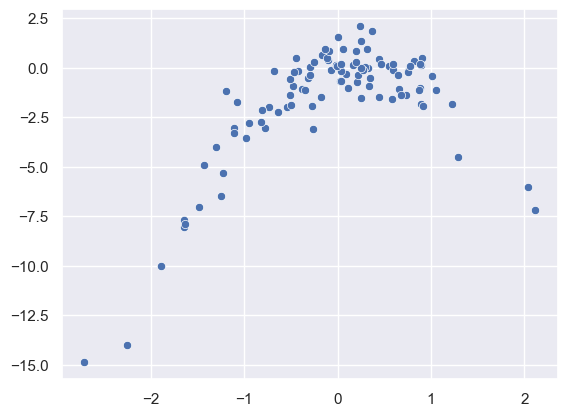

In [50]:
sns.scatterplot(x=x, y=y)
plt.show()

It clearly has a strong nonlinear relationship, which seems parbolic and looks no more complicated than a second degree polynomial ( which is exactly what it is ).

## Problem 9.c

In [51]:
pd.DataFrame(
    {
        "error": [
            -np.mean(
                cross_val_score(
                    LinearRegression(),
                    [[e**n for n in range(1, i + 1)] for e in x],
                    y,
                    cv=LeaveOneOut(),
                    scoring="neg_mean_squared_error",
                )
            )
            for i in range(1, 5)
        ]
    },
    index=["Degree {}".format(x) for x in range(1, 5)],
)

,error
Degree 1,6.633030
Degree 2,1.122937
Degree 3,1.301797
Degree 4,1.332394


## Problem 9.d

In [52]:
rng = np.random.default_rng(42)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
pd.DataFrame(
    {
        "error": [
            -np.mean(
                cross_val_score(
                    LinearRegression(),
                    [[e**n for n in range(1, i + 1)] for e in x],
                    y,
                    cv=LeaveOneOut(),
                    scoring="neg_mean_squared_error",
                )
            )
            for i in range(1, 5)
        ]
    },
    index=["Degree {}".format(x) for x in range(1, 5)],
)

,error
Degree 1,4.251883
Degree 2,0.963998
Degree 3,0.991271
Degree 4,1.018180


Yes, the numbers are very different but the overall trends is the same: degree 2 is the best. This makes sense given the awnser to part e, and it is the same as a mix of luck and over/underfitting.

## Problem 9.e

The second degree polynomial performs be bes in both tests, which is what we expect; we expect smaller degree to underfit and a larger degree to overfit.

## Problem 9.f

In [53]:
smf.ols("y ~ x", data=pd.DataFrame({"x": x, "y": y})).fit(disp=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     35.70
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           3.72e-08
Time:                        10:27:24   Log-Likelihood:                -209.26
No. Observations:                 100   AIC:                             422.5
Df Residuals:                      98   BIC:                             427.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1833      0.199     -5.960      0.000      -1.577      -0.789
x              1.5320      0.256      5.975      0.000       1.023       2.041
==============================================================================
Omnibus:                       50.047   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.214
Skew:                          -1.745   Prob(JB):                     9.83e-36
Kurtosis:                       8.149   Cond. No.                         1.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
smf.ols("y ~ x + np.power(x,2)", data=pd.DataFrame({"x": x, "y": y})).fit(
    disp=False
).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           2.02e-37
Time:                        10:27:24   Log-Likelihood:                -137.69
No. Observations:                 100   AIC:                             281.4
Df Residuals:                      97   BIC:                             289.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1072      0.122      0.878      0.382      -0.135       0.350
x                  1.0800      0.129      8.400      0.000       0.825       1.335
np.power(x, 2)    -2.1898      0.125    -17.576      0.000      -2.437      -1.943
==============================================================================
Omnibus:                        2.591   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.542
Skew:                           0.380   Prob(JB):                        0.281
Kurtosis:                       2.818   Cond. No.                         2.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
smf.ols(
    "y ~ x + np.power(x,2) + np.power(x,3)", data=pd.DataFrame({"x": x, "y": y})
).fit(disp=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           2.18e-36
Time:                        10:27:24   Log-Likelihood:                -137.21
No. Observations:                 100   AIC:                             282.4
Df Residuals:                      96   BIC:                             292.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1167      0.123      0.952      0.343      -0.127       0.360
x                  0.9235      0.207      4.464      0.000       0.513       1.334
np.power(x, 2)    -2.1946      0.125    -17.595      0.000      -2.442      -1.947
np.power(x, 3)     0.0940      0.097      0.966      0.336      -0.099       0.287
==============================================================================
Omnibus:                        2.922   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.733
Skew:                           0.404   Prob(JB):                        0.255
Kurtosis:                       2.935   Cond. No.                         4.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
smf.ols(
    "y ~ x + np.power(x,2) + np.power(x,3) + np.power(x,4)",
    data=pd.DataFrame({"x": x, "y": y}),
).fit(disp=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           2.34e-35
Time:                        10:27:24   Log-Likelihood:                -136.97
No. Observations:                 100   AIC:                             283.9
Df Residuals:                      95   BIC:                             297.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0582      0.150      0.387      0.699      -0.240       0.357
x                  0.9089      0.209      4.357      0.000       0.495       1.323
np.power(x, 2)    -1.9896      0.328     -6.057      0.000      -2.642      -1.337
np.power(x, 3)     0.1149      0.102      1.122      0.265      -0.088       0.318
np.power(x, 4)    -0.0623      0.092     -0.675      0.501      -0.246       0.121
==============================================================================
Omnibus:                        2.673   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                2.452
Skew:                           0.383   Prob(JB):                        0.293
Kurtosis:                       2.960   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Yes, the statistical significance results make sense, becuase we see a strong corrilation with the $0$th and $1$st degree terms, which are a part of the known function for $y$, and a not statistically significant corrilation with the $2$nd and $3$rd degree polynomials because they not a part of the know function for $y$. This also agree with the results from the cross-validation tests: that 3rd and 4th degree terms are not helpful / harmful.

# Problem 10
## Problem 10.a

In [57]:
mean = np.mean(boston["medv"])
Markdown("The mean is: " + str(mean))

The mean is: 22.532806324110677

## Problem 10.b

In [58]:
sem = np.std(boston["medv"]) / np.sqrt(np.size(boston["medv"]))
Markdown("The standard error is: " + str(sem))

The standard error is: 0.4084569346972866

## Problem 10.c

In [59]:
np.random.seed(42)
boostrap = [np.mean(np.random.choice(boston["medv"], size=len(boston["medv"]), replace=True)) for i in range(1000)]
Markdown("The standard error is: " + str(np.std(boostrap)))

The standard error is: 0.39688532048705005

The boostrapped estimation is nearly identical to the calculated estimation

## Problem 10.d

In [60]:
Markdown("Boostrap interval: (" + str(np.percentile(boostrap, 5)) + ", " + str(np.percentile(boostrap, 95)) + ")")

Boostrap interval: (21.89533596837945, 23.170207509881426)

In [61]:
Markdown("Standard Error interval: (" + str(mean-2*sem) + ", " + str(mean+2*sem) + ")")

Standard Error interval: (21.715892454716105, 23.34972019350525)

These are once again nearly identical

## Problem 10.e

In [62]:
Markdown("The median is: " + str(np.median(boston["medv"])))

The median is: 21.2

## Problem 10.f

In [63]:
np.std([np.median(np.random.choice(boston["medv"], size=len(boston["medv"]), replace=True)) for i in range(1000)])

0.3758688468069677

This makes sense given the data: it is around the standard error of the mean.

## Problem 10.g

In [64]:
print("the 10th percentile is: " + str(np.percentile(boston["medv"],0.1)))

the 10th percentile is: 5.0


## Problem 10.h

In [65]:
print("the standard error of the 10th percentile is: " + str(np.std([np.percentile(np.random.choice(boston["medv"], size=len(boston["medv"]), replace=True), 0.1) for i in range(1000)])))

the standard error of the 10th percentile is: 0.4769626719961951


This passes the sanity check; it is also similar to the sw of the mean and median, and is not very large or small compared to the data.